# Tutorial 1: Introduction to ML and Sklearn

[![View notebooks on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial10/Adversarial_Attacks.ipynb)

**Author:** Alejandro Monroy

In this course we will introduce some of the classical ML algorithms. More specifically, we will focus on:
- Supervised learning: the model is trained on labeled data to learn to predict a certain output. In this course we will focus on the two classical problems:
    - Regression: predicting a numerical **target** ($y$) given the input features ($X$).
    - Classification: predicting a categorical **label** ($y$) given the featurs ($X$).
- Unsupervised learning: The model is trained trained on unlabeled data to find patterns/structures in the data. In this course we will see:
    - Clustering: group a set of samples ($X$) in such a way that samples in the same group/cluster are more similar to each other than to those in other groups.
    - Dimensionality reduction: reducing the number of features in $X$ while retaining as much information as possible.

An priceless ally in our journey will be the _scikit-learn_ library, which offers a variety of algorithms for multiple machine learning tasks. It is built on top of NumPy, SciPy, and matplotlib. Although we will code our own implementation of some machine learning models, we will also see how to quickly build ML pipelines using _scikit-learn_.

In this tutorial we will introduce the basic functionalities of _scikit-learn_ through a regression problem. 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the data

We are going to use the `diabetes` dataset provided in the `sklearn` library:

In [35]:
from sklearn import datasets
diabetes = datasets.load_diabetes(as_frame=True, scaled=False)

It looks like it worked! But, what is the `diabetes` variable exactly? A `numpy` array? A `pandas` datafame? Or maybe something else? Let's figure it out:

In [36]:
print(type(diabetes))
print(diabetes.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


❗️ _**Note:** Always make sure that you know the data types of the variables you are working with. It will help you make sure that you use them correctly and prevent errors._

It turns out that the `load_diabetes` function returned a [`Bunch`](https://scikit-learn.org/1.5/modules/generated/sklearn.utils.Bunch.html) with some attributes such as `data`, `target` or `DESCR`. Let's print the description of the dataset:

In [37]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Nice! Now we know what the dataset is about. We can see that we have 10 features (stored in `diabetes.data`) and one target (stored in `diabetes.target`). By convention, we usually store the features in a matrix $X$ and the target in a vector $y$:

In [38]:
X = diabetes.data
y = diabetes.target

print(X.shape)
print(y.shape)

(442, 10)
(442,)


Let's take a look at some samples:

In [39]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [40]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

## 2. Data exploration
Analyzing the distribution of the data helps in understanding it better and identifying any potential anomalies.

The `df.describe()` method gives us some basic statistics of each of the features:

In [41]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


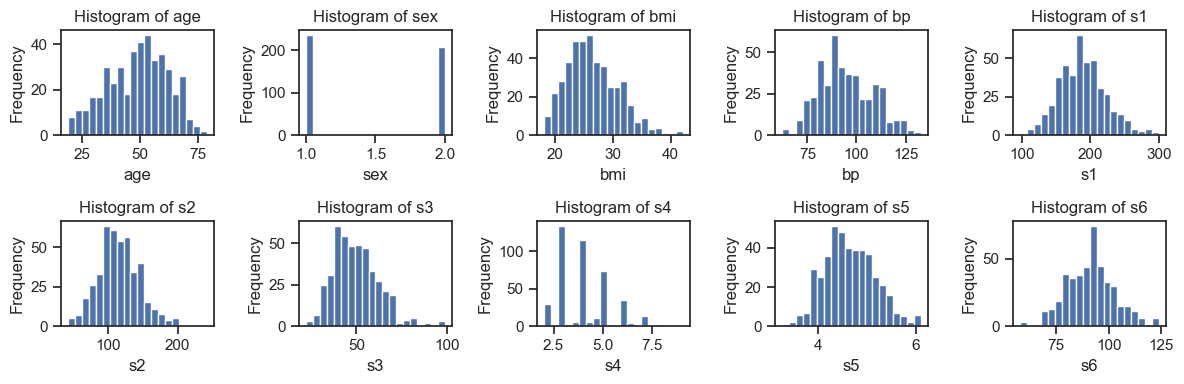

In [52]:
# Create a 2x5 grid for the histograms
fig, axes = plt.subplots(2, 5, figsize=(12, 4))
axes = axes.flatten()

# Plot histogram for each feature in a separate subplot
for i, column in enumerate(X.columns):
    axes[i].hist(X[column], bins=20)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Now let's see how the variables relate to each other by computing the correlation matrix:

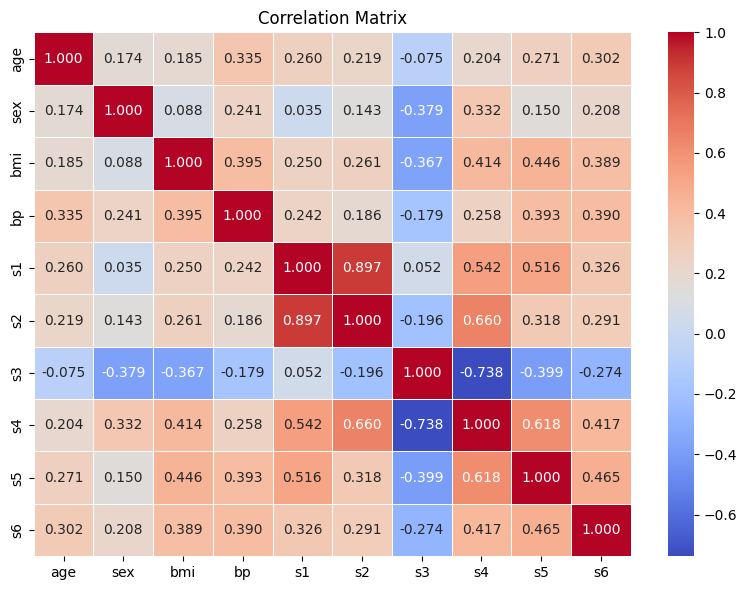

In [29]:
corr_matrix = X.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", annot_kws={"size": 10}, linewidths=0.5)

plt.title('Correlation Matrix')
plt.tight_layout()

plt.show()

We observe some positive correlation between `s1`and `s2` and negative between `s3` and `s4`. 

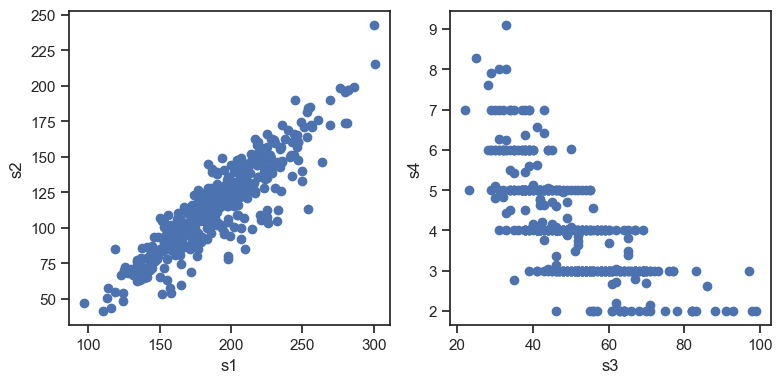

In [59]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot (s1, s2) on the first subplot
axes[0].scatter(X['s1'], X['s2'])
axes[0].set_xlabel("s1")
axes[0].set_ylabel("s2")

# Plot (s3, s4) on the second subplot
axes[1].scatter(X['s3'], X['s4'])
axes[1].set_xlabel("s3")
axes[1].set_ylabel("s4")

# Adjust layout
plt.tight_layout()
plt.show()

📝 _**Task for you:** Plot the scatter of all variables against all others (you can do that easily with `sns.pairplot(X)`) and check that the correlations in the matrix above align with what you observe in the plots!_

## 3. Data preprocessing
Now we will prepare the data. In this tutorial we will only normalize the data and split it into a training and test set, but other datasets might need additional steps, such as handling missing values.

### 3.1. Data normalization
In both the descriptives summary and the histograms we observed that each feature is distributed across a different range of values. To enhance the performance of our models, we will normalize the features so that they all take values in a similar range. We will use the following types of normalization available in sklearn:
- **Min-Max Scaling**: Transforms features by scaling each feature to a given range, usually $[0, 1]$.
  $$ \mathbf{x}_{\text{scaled}} = \frac{\mathbf{x} - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}.$$
- **Standardization**: Centers the data by subtracting the mean and scales it by dividing by the standard deviation, resulting in a distribution with a mean of 0 and a standard deviation of 1.
  $$\mathbf{x}_{\text{standardized}} = \frac{\mathbf{x} - \mu}{\sigma},$$
  where $\mu$ is the mean and $\sigma$ is the standard deviation of the feature.

- **Normalization**: Scales individual samples to have unit norm (i.e., the sum of the squares of the values is $1$).
  $$\mathbf{x}_{\text{normalized}} = \frac{\mathbf{x}}{\|\mathbf{x}\|},$$
  where $\|\mathbf{x}\|$ is the Euclidean norm of the feature vector.

The following code cell shows how to standarize the data with sklearn:

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_normalized

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

### 3.2. Train-test split
In supervised learning, we use part of the data to train the model and the other part to evaluate it. We can easily make this division with the `train_test_split` function from sklearn:

Recall that our initial dataset had 442 samples. Let's create a training set with 80% of the samples and a test set with the other 20%:

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (353, 10)
Shape of X_test: (89, 10)
Shape of y_train: (353,)
Shape of y_test: (89,)


🤔 _**Food for thought:** the train_test_split function randomly chooses the samples to be included in each split. To always get the same result, we set the argument `random_state=42` (or any other seed), so that the random numbers that are generated inside the function are always the same (and therefore so are the splits). Reproducibility is very important in AI. Make sure that your results are reproducible by setting a seed every time there is randomness involved!_

## 4. Our first ML model
To keep things easy for our first model, we will train a model that outputs the mean of the targets in the training set. The following code cell includes the standard steps to train a supervised sklearn model:

In [63]:
from sklearn.dummy import DummyRegressor

# 1. Create instance (object) of the DummyRegressor class
dummy_regr = DummyRegressor(strategy="mean")

# 2. Train the model using the training data
dummy_regr.fit(X_train, y_train)

# 3. Make predictions using the test data
dummy_regr.predict(X_test)

array([153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73654391,
       153.73654391, 153.73654391, 153.73654391, 153.73

🤔 _**Food for thought:** You might be wondering what is the point in "training" a model that always outputs the mean of the targets in the training set. We don't really need ML or sklearn for that. And you are totally right! This is why this model is called _dummy_. We are using it just to become familiar with the sklearn framework. Don't worry, we will dedicate the rest of the course to learn about less _dummy_ models_ 😉.